**Estudo de Caso 2 "Materials Project and Perovskite Datasets" do artigo PiNN: A Python Library for Building Atomic Neural Networks of Molecules and Materials**

Etapa 0: Instalações necessárias utilizando o Jupyter Notebook

* Instalar: Miniconda3 Python 3.10 para Windows 64-bit -> É necessário para usar a biblioteca PINN do artigo
* No “Anaconda Prompt” digitar:
    * conda --version
    * conda create -n pinn python=3.9
    * conda activate pinn
    * conda install numpy scipy matplotlib ase
* Instalar o Git em https://git-scm.com/download/win
* No “Anaconda Prompt” digitar:
    * git --version
    * https://git-scm.com/download/win
    * python -c "import pinn; print(pinn.__version__)"

In [1]:
!pip install "pydantic<2.0"
!pip install emmet-core==0.57.0
!pip install mp-api==0.45.5
!pip install pymatgen
!pip install matminer
!pip install aiobotocore

Defaulting to user installation because normal site-packages is not writeable
  Using cached pydantic-1.10.22-cp312-cp312-win_amd64.whl.metadata (155 kB)
Using cached pydantic-1.10.22-cp312-cp312-win_amd64.whl (2.2 MB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.11.7
    Uninstalling pydantic-2.11.7:
      Successfully uninstalled pydantic-2.11.7


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
emmet-core 0.84.9 requires pydantic>=2.0, but you have pydantic 1.10.22 which is incompatible.
maggma 0.72.0 requires pydantic>=2.0, but you have pydantic 1.10.22 which is incompatible.
pydantic-settings 2.6.1 requires pydantic>=2.7.0, but you have pydantic 1.10.22 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable
  Using cached emmet_core-0.57.0-py3-none-any.whl.metadata (1.9 kB)
Using cached emmet_core-0.57.0-py3-none-any.whl (154 kB)
  Attempting uninstall: emmet-core
    Found existing installation: emmet-core 0.84.9
    Uninstalling emmet-core-0.84.9:
      Successfully uninstalled emmet-core-0.84.9


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mp-api 0.45.5 requires emmet-core>=0.84.3rc6, but you have emmet-core 0.57.0 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable
  Using cached emmet_core-0.84.9-py3-none-any.whl.metadata (2.8 kB)
  Using cached pydantic-2.11.7-py3-none-any.whl.metadata (67 kB)
  Using cached botocore-1.40.11-py3-none-any.whl.metadata (5.7 kB)
Using cached emmet_core-0.84.9-py3-none-any.whl (241 kB)
Using cached pydantic-2.11.7-py3-none-any.whl (444 kB)
Using cached botocore-1.40.11-py3-none-any.whl (14.0 MB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.22
    Uninstalling pydantic-1.10.22:
      Successfully uninstalled pydantic-1.10.22
  Attempting uninstall: botocore
    Found existing installation: botocore 1.39.11
    Uninstalling botocore-1.39.11:
      Successfully uninstalled botocore-1.39.11
  Attempting uninstall: emmet-core
    Found existing installation: emmet-core 0.57.0
    Uninstalling emmet-core-0.57.0:
      Successfully uninstalled emmet-core-0.57.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.24.1 requires botocore<1.39.12,>=1.39.9, but you have botocore 1.40.11 which is incompatible.
s3fs 2024.6.1 requires fsspec==2024.6.1.*, but you have fsspec 2025.7.0 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached botocore-1.39.11-py3-none-any.whl.metadata (5.7 kB)
Using cached botocore-1.39.11-py3-none-any.whl (13.9 MB)
  Attempting uninstall: botocore
    Found existing installation: botocore 1.40.11
    Uninstalling botocore-1.40.11:
      Successfully uninstalled botocore-1.40.11


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
boto3 1.40.11 requires botocore<1.41.0,>=1.40.11, but you have botocore 1.39.11 which is incompatible.
s3fs 2024.6.1 requires fsspec==2024.6.1.*, but you have fsspec 2025.7.0 which is incompatible.


Etapa 1: Obter sua API Key
* Criar acesso em https://materialsproject.org
* Copiar a sua PIN Key (no meu caso: sv9BBcTrwKd0WSFnRqhFURQ8pbhNHBkK)

Etapa 2: Buscar dados reais de materiais

Instalar o Matminer

In [3]:
# 1. Importar bibliotecas
from mp_api.client import MPRester
import pandas as pd
import numpy as np

# 2. Conectar ao Materials Project
mpr = MPRester("sv9BBcTrwKd0WSFnRqhFURQ8pbhNHBkK")

# 3. Definir campos desejados
campos_basicos = ["material_id", "formula_pretty", "density", "volume", "nsites"]

# 4. Fazer a consulta por materiais com ferro
results = mpr.materials.search(elements=["Fe"], fields=campos_basicos)

# 5. Extrair apenas os campos úteis manualmente
dados = []
for r in results:
    dados.append({
        "material_id": r.material_id,
        "formula_pretty": r.formula_pretty,
        "density": r.density,
        "volume": r.volume,
        "nsites": r.nsites
    })

df = pd.DataFrame(dados)

# 6. Exibir os dados estruturais (texto puro)
print("Dados estruturais limpos:")
print(df.head().to_string())

# 7. Dividir lista de IDs em blocos
material_ids = df["material_id"].tolist()
chunks = np.array_split(material_ids, int(len(material_ids) / 100) + 1)

# 8. Buscar dados termoquímicos em blocos
thermo_data = []
for chunk in chunks:
    termo = mpr.materials.thermo.search(
        material_ids=list(chunk),
        fields=["material_id", "formation_energy_per_atom", "energy_above_hull"]
    )
    for r in termo:
        thermo_data.append({
            "material_id": r.material_id,
            "formation_energy_per_atom": r.formation_energy_per_atom,
            "energy_above_hull": r.energy_above_hull
        })

# 9. Criar DataFrame termoquímico
df_thermo = pd.DataFrame(thermo_data)
print("\nDados termoquímicos:")
print(df_thermo.head().to_string())

# 10. Juntar os dados
df_final = pd.merge(df, df_thermo, on="material_id")
print("\nDados combinados:")
print(df_final.head().to_string())

# 11. Exportar para CSV
df_final.to_csv("materiais_fe_completos.csv", index=False)
print("\n✅ Arquivo CSV exportado com sucesso: 'materiais_fe_completos.csv'")

Retrieving MaterialsDoc documents:   0%|          | 0/12956 [00:00<?, ?it/s]

Dados estruturais limpos:
  material_id formula_pretty   density       volume  nsites
0  mp-1245108             Fe  7.965581  1164.168707     100
1  mp-1194030             Fe  7.642711   339.737882      28
2  mp-1271068             Fe  8.109374    45.741043       4
3  mp-1271128             Fe  8.517773    21.773956       2
4  mp-1096950             Fe  7.230889    12.824538       1


Retrieving ThermoDoc documents:   0%|          | 0/228 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/230 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/222 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/216 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/225 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/231 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/233 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/223 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/215 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/234 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/221 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/220 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/208 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/242 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/227 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/215 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/202 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/225 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/208 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/219 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/204 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/201 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/203 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/200 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/202 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/202 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/202 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/200 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/202 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/201 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/205 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/201 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/200 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/201 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/203 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/200 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/201 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/201 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/201 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/229 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/234 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/221 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/212 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/216 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/203 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/200 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/201 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/200 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/202 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/206 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/201 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/201 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/206 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/201 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/204 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/200 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/203 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/202 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/202 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/203 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/205 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/263 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/208 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/215 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/239 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/211 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/229 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/209 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/202 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/202 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/201 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/200 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/201 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/201 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/200 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/202 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/202 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/200 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/201 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/203 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/203 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/201 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/200 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/200 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/201 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/202 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/199 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/200 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/219 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/233 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/200 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/198 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/224 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/202 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/211 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/216 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/211 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/198 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/202 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/199 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/203 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/197 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/198 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/200 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/200 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/200 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/199 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/199 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/209 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/205 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/203 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/198 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/199 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/210 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/215 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/198 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/203 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/201 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/201 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/202 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/198 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/200 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/199 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/202 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/206 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/200 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/202 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/206 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/199 [00:00<?, ?it/s]

Retrieving ThermoDoc documents:   0%|          | 0/201 [00:00<?, ?it/s]


Dados termoquímicos:
  material_id  formation_energy_per_atom  energy_above_hull
0  mp-1072880                   0.357709           0.357709
1  mp-1072880                   0.357709           0.357709
2  mp-1178247                  -1.370252           0.111268
3  mp-1178247                  -1.370252           0.111268
4  mp-1181398                  -2.600620           0.038028

Dados combinados:
  material_id formula_pretty   density       volume  nsites  formation_energy_per_atom  energy_above_hull
0  mp-1245108             Fe  7.965581  1164.168707     100                   0.279455           0.279455
1  mp-1245108             Fe  7.965581  1164.168707     100                   0.279455           0.279455
2  mp-1194030             Fe  7.642711   339.737882      28                   0.175289           0.175289
3  mp-1194030             Fe  7.642711   339.737882      28                   0.175289           0.175289
4  mp-1271068             Fe  8.109374    45.741043       4          

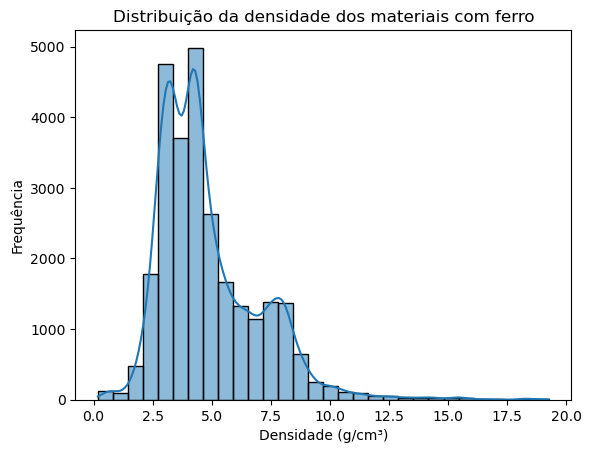

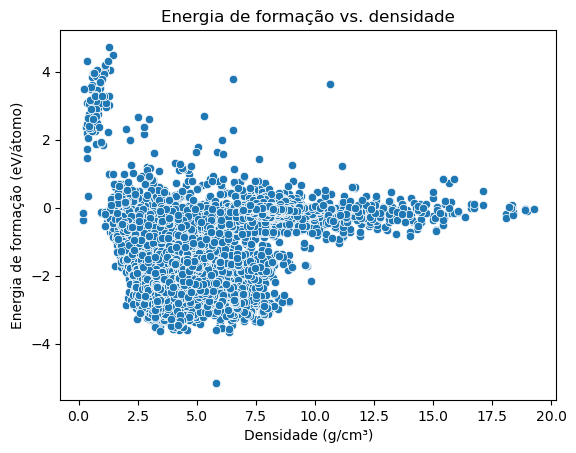

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma da densidade
sns.histplot(df_final["density"], bins=30, kde=True)
plt.title("Distribuição da densidade dos materiais com ferro")
plt.xlabel("Densidade (g/cm³)")
plt.ylabel("Frequência")
plt.show()

# Relação entre energia de formação e densidade
sns.scatterplot(data=df_final, x="density", y="formation_energy_per_atom")
plt.title("Energia de formação vs. densidade")
plt.xlabel("Densidade (g/cm³)")
plt.ylabel("Energia de formação (eV/átomo)")
plt.show()

In [5]:
# Filtrar materiais com energia acima da linha de estabilidade < 0.05 eV
materiais_estaveis = df_final[df_final["energy_above_hull"] < 0.05]
print(f"\nMateriais estáveis encontrados: {len(materiais_estaveis)}")
print(materiais_estaveis.head().to_string())


Materiais estáveis encontrados: 11490
   material_id formula_pretty   density     volume  nsites  formation_energy_per_atom  energy_above_hull
4   mp-1271068             Fe  8.109374  45.741043       4                    0.01707            0.01707
5   mp-1271068             Fe  8.109374  45.741043       4                    0.01707            0.01707
18       mp-13             Fe  7.902858  23.468168       2                    0.00000            0.00000
19       mp-13             Fe  7.902858  23.468168       2                    0.00000            0.00000
20       mp-13             Fe  7.902858  23.468168       2                    0.00000            0.00000


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Selecionar features e alvo
features = df_completo[["density", "volume", "nsites", "band_gap"]].fillna(0)
target = df_completo["energy_above_hull"].fillna(0)

In [20]:
mae_por_tamanho = []
tamanhos = [10, 20, 30, 40, 50, 60, 70, 90]

for pct in tamanhos:
    X_train, X_val, y_train, y_val = train_test_split(
        features, target, train_size=pct/100, random_state=42
    )
    
    modelo = RandomForestRegressor(n_estimators=100, random_state=42)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_val)
    
    mae = mean_absolute_error(y_val, y_pred)
    mae_por_tamanho.append(mae)
    print(f"✅ Treinamento com {pct}% dos dados → MAE: {mae:.4f} eV/atom")

✅ Treinamento com 10% dos dados → MAE: 0.0110 eV/atom
✅ Treinamento com 20% dos dados → MAE: 0.0095 eV/atom
✅ Treinamento com 30% dos dados → MAE: 0.0086 eV/atom
✅ Treinamento com 40% dos dados → MAE: 0.0078 eV/atom
✅ Treinamento com 50% dos dados → MAE: 0.0071 eV/atom
✅ Treinamento com 60% dos dados → MAE: 0.0065 eV/atom
✅ Treinamento com 70% dos dados → MAE: 0.0058 eV/atom
✅ Treinamento com 90% dos dados → MAE: 0.0050 eV/atom


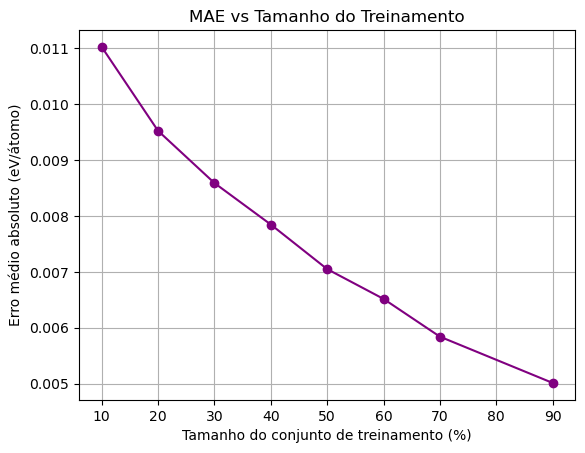

In [21]:
import matplotlib.pyplot as plt

plt.plot(tamanhos, mae_por_tamanho, marker='o', color='purple')
plt.xlabel("Tamanho do conjunto de treinamento (%)")
plt.ylabel("Erro médio absoluto (eV/átomo)")
plt.title("MAE vs Tamanho do Treinamento")
plt.grid(True)
plt.savefig("mae_vs_treinamento.png")
plt.show()

In [22]:
import os
os.getcwd()

'C:\\Users\\Cassio Souza\\anaconda_projects\\72978dcf-0512-4e4d-853a-1a60034af278'